# Corpora Ingestion: en_50k_2018

## Overview

I downloaded this file from HermitDave's FrequencyWord repo: https://github.com/hermitdave/FrequencyWords/blob/master/content/2018/en/en_50k.txt

## Contents
* Imports & Settings
* Global Variables
* Helper Functions
* EDA
  * Read in Raw File
  * Character Count Exploration (Raw Words)
  * Identify Invalid Words
  * Cross-Check Character Counts
  * Character Count Exploration (Valid Words)
  * Export Valid File

## Imports & Settings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import Counter
%matplotlib inline

## Global Variables

In [3]:
valid_chars = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm'
               , 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

## Helper Functions

In [4]:
def get_char_counter(words, frequencies):
    # take a list of words and a corresponding list of frequencies
    # return a counter with the sum of characters in all words, weighted by frequency    
    counter = Counter()
    for word, frequency in zip(words, frequencies):
        new_counter = Counter(str(word))
        for _ in new_counter.keys():
            new_counter[_] = new_counter[_] * frequency
        counter.update(new_counter)
        
    return counter

def is_invalid_word(word, invalid_char_list):
    # take a word and a list of invalid chars
    # if any of the invalid chars are in the word, return false
    # else, return true
    return any(invalid_char in str(word) for invalid_char in invalid_char_list)

## Raw File EDA

### Read in Raw File

In [5]:
raw_file_path = r'D:\code_repos\LexGen\data\corpora\en_50k_2018\en_50k_2018-RAW.txt'
raw_words = pd.read_csv(raw_file_path, sep=' ', header=None, names=['word','frequency'])

In [6]:
raw_words.head()

,word,frequency
0,you,28787591
1,i,27086011
2,the,22761659
3,to,17099834
4,a,14484562


### Character Count Exploration (Raw Words)

In [7]:
char_counter = get_char_counter(raw_words['word'].tolist(), raw_words['frequency'].tolist())

In [8]:
print(char_counter)

Counter({'e': 317758171, 't': 252863727, 'o': 243632065, 'a': 208469923, 'i': 192792447, 'n': 177477796, 'h': 159841703, 's': 159386595, 'r': 143335320, 'l': 114242322, 'u': 100426995, 'd': 95888458, 'y': 90697550, 'm': 74980830, 'w': 72508000, 'g': 66429118, 'c': 59766718, 'f': 45788687, 'b': 41078194, 'p': 40235384, "'": 38976555, 'k': 36833453, 'v': 26855865, 'j': 7002669, 'x': 3367545, 'z': 1745765, '-': 1623514, 'q': 1510497, '.': 1430364, '0': 114275, '1': 88837, '2': 56690, 'é': 52966, '`': 34653, '3': 31264, '4': 25179, '5': 24570, '8': 23131, '9': 22464, '6': 17965, 'ο': 17920, '7': 17633, 'ö': 15343, 'ñ': 10737, 'í': 8925, 'á': 7199, 'ü': 4462, 'ó': 4370, 'ç': 4166, 'è': 3892, 'ã': 3514, 'à': 2040, 'ú': 1587, 'â': 1152, 'ø': 982, 'ô': 785, 'ä': 742, 'î': 737, 'τ': 697, 'υ': 646, 'ò': 557, 'η': 553, 'ì': 532, 'ë': 498, 'ê': 469, 'ﬁ': 418, 'ﬂ': 415, 'æ': 373, 'ş': 366, 'İ': 328, 'ï': 320, 'ν': 308, 'û': 270, 'µ': 270, 'å': 207, 'у': 195, 'ý': 166})


In [9]:
good_char_counter = {k: char_counter[k] for k in valid_chars}

In [10]:
print(good_char_counter)

{'a': 208469923, 'b': 41078194, 'c': 59766718, 'd': 95888458, 'e': 317758171, 'f': 45788687, 'g': 66429118, 'h': 159841703, 'i': 192792447, 'j': 7002669, 'k': 36833453, 'l': 114242322, 'm': 74980830, 'n': 177477796, 'o': 243632065, 'p': 40235384, 'q': 1510497, 'r': 143335320, 's': 159386595, 't': 252863727, 'u': 100426995, 'v': 26855865, 'w': 72508000, 'x': 3367545, 'y': 90697550, 'z': 1745765}


In [11]:
invalid_chars = [char for char in char_counter.keys() if char not in valid_chars]

In [12]:
bad_char_counter = {k: char_counter[k] for k in invalid_chars}

In [13]:
print(bad_char_counter)

{"'": 38976555, '.': 1430364, '-': 1623514, 'ö': 15343, '2': 56690, '1': 88837, '3': 31264, '0': 114275, '`': 34653, 'é': 52966, '4': 25179, 'ñ': 10737, '8': 23131, '5': 24570, '9': 22464, '7': 17633, 'ο': 17920, '6': 17965, 'ç': 4166, 'í': 8925, 'ü': 4462, 'á': 7199, 'à': 2040, 'ã': 3514, 'ó': 4370, 'è': 3892, 'ä': 742, 'η': 553, 'â': 1152, 'ø': 982, 'ú': 1587, 'ê': 469, 'υ': 646, 'ş': 366, 'İ': 328, 'ï': 320, 'ô': 785, 'ν': 308, 'τ': 697, 'ò': 557, 'û': 270, 'ì': 532, 'µ': 270, 'î': 737, 'ë': 498, 'ﬂ': 415, 'ﬁ': 418, 'æ': 373, 'å': 207, 'у': 195, 'ý': 166}


In [14]:
print(len(invalid_chars))

51


In [15]:
res = is_invalid_word('wor.d', invalid_chars)
print(res)

True


### Identify Invalid Words

In [16]:
raw_words['invalid'] = raw_words['word'].apply(is_invalid_word, invalid_char_list=invalid_chars)

In [17]:
raw_words.head()

,word,frequency,invalid
0,you,28787591,False
1,i,27086011,False
2,the,22761659,False
3,to,17099834,False
4,a,14484562,False


In [18]:
raw_words['invalid'].value_counts()

False    46717
True      3283
Name: invalid, dtype: int64

In [19]:
raw_words[raw_words['invalid']]

,word,frequency,invalid
5,'s,14291013,True
9,'t,9628970,True
25,'m,4386306,True
31,'re,4059719,True
43,'ll,2913428,True
...,...,...,...
49960,podnapisi.net,159,True
49963,word-,159,True
49985,girls-,159,True
49996,hyeon-to,159,True


### Cross-check Character Counts

In [20]:
total_chars = 0
for word, frequency in zip(raw_words['word'].tolist(), raw_words['frequency'].tolist()):
    total_chars += len(str(word)) * frequency
print(total_chars)

2777551998


In [21]:
total_chars_check = 0
for val in char_counter.values():
    total_chars_check += val
print(total_chars_check)

2777551998


In [22]:
total_chars_check2 = 0
for val in good_char_counter.values():
    total_chars_check2 += val
for val in bad_char_counter.values():
    total_chars_check2 += val
print(total_chars_check2)

2777551998


### Export Final Words

In [24]:
valid_words = raw_words[raw_words['invalid'] == False]

In [27]:
valid_words = valid_words.drop('invalid' , axis='columns')

In [28]:
valid_words.shape

(46717, 2)

In [29]:
valid_file_path = r'D:\code_repos\LexGen\data\corpora\en_50k_2018\en_50k_2018-VALID.txt'

In [30]:
valid_words.to_csv(valid_file_path, sep=' ', index=False)

### Character Count Exploration (Valid Words)

#### Plot of Character Frequency for Valid Words

In [31]:
# get a new counter based on just the valid words
valid_char_counter = get_char_counter(valid_words['word'].tolist(), valid_words['frequency'].tolist())

In [37]:
# normalize the counts
total_valid_chars = sum(valid_char_counter.values())
for key in valid_char_counter:
    valid_char_counter[key] /= total_valid_chars

In [38]:
print(valid_char_counter)

Counter({'e': 0.1161531958558534, 'o': 0.09076016436926419, 't': 0.0906851336828247, 'a': 0.07759694582055122, 'i': 0.0717795985270916, 'n': 0.06612297397577946, 'h': 0.059466435038697335, 's': 0.053956765942306084, 'r': 0.051599996443366616, 'l': 0.04033116671939905, 'u': 0.037355723132727586, 'd': 0.035213144860220105, 'y': 0.033807192970442525, 'w': 0.027023672837477475, 'm': 0.025889086732067156, 'g': 0.02475675457796143, 'c': 0.02219483472665589, 'f': 0.017013303374359367, 'b': 0.015281275746735339, 'p': 0.014973170256773576, 'k': 0.013717498624588327, 'v': 0.009275839509531576, 'j': 0.0025914415996263073, 'x': 0.0012417928447115525, 'z': 0.0006504408074716791, 'q': 0.0005624510235164438})


<BarContainer object of 26 artists>

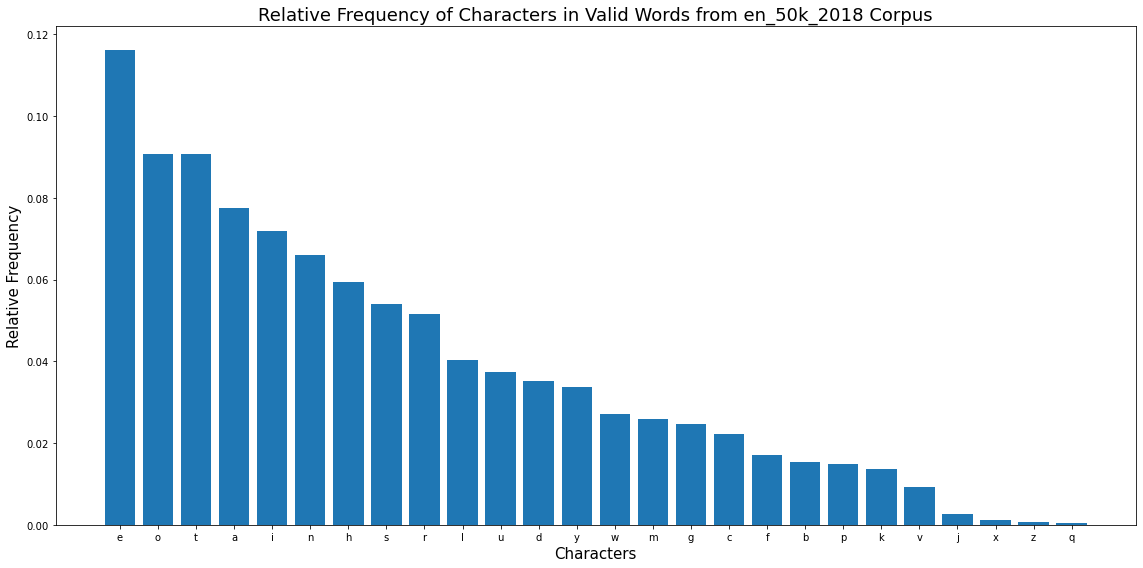

In [56]:
# print out a bar plot of the normalized count of characters from the valid words
plt.figure(figsize=(16,8))
plt.xlabel('Characters', size=15)
plt.ylabel('Relative Frequency', size=15)
plt.title('Relative Frequency of Characters in Valid Words from en_50k_2018 Corpus', size=18)
plt.tight_layout()
chars, norm_freqs = map(list, zip(*valid_char_counter.most_common()))
plt.bar(chars, norm_freqs)

#### Plot of Character Frequency for Valid Words vs. All Words

In [59]:
# normalize the counts of good characters (from valid + invalid words)
total_good_chars = sum(good_char_counter.values())
for key in good_char_counter:
    good_char_counter[key] /= total_good_chars

In [60]:
good_char_counter

{'a': 0.07622535334677435,
 'b': 0.015019911781218177,
 'c': 0.021853220514342585,
 'd': 0.03506084469042248,
 'e': 0.11618572365136695,
 'f': 0.016742265721755235,
 'g': 0.024289273575759746,
 'h': 0.058444835184810626,
 'i': 0.07049301013635557,
 'j': 0.002560469688932072,
 'k': 0.013467856319526754,
 'l': 0.04177178768184211,
 'm': 0.02741613839894026,
 'n': 0.0648933309737287,
 'o': 0.08908210821965573,
 'p': 0.014711745072420597,
 'q': 0.000552301098869992,
 'r': 0.05240940878590421,
 's': 0.058278428599094455,
 't': 0.09245759130038766,
 'u': 0.03672032430035359,
 'v': 0.00981963138662583,
 'w': 0.0265119679660836,
 'x': 0.0012313157881108981,
 'y': 0.033162830862832594,
 'z': 0.0006383249538852256}

#### Plot of Character Frequency for Valid Words vs. All Words vs. Baseline for English

Source: https://en.wikipedia.org/wiki/Letter_frequency